In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
i=load_iris()

In [3]:
i

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
k=pd.DataFrame(i.data,columns=i.feature_names)

In [5]:
k

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
k['target']=i.target

In [7]:
kk=k.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
kk

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [8]:
kmeans=KMeans(n_clusters=3)

In [9]:
y_pred=kmeans.fit_predict(kk[['petal length (cm)','target']])

In [10]:
kk['cluster']=y_pred
kk

,petal length (cm),petal width (cm),target,cluster
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,2
146,5.0,1.9,2,2
147,5.2,2.0,2,2
148,5.4,2.3,2,2


In [11]:
kk1=kk[kk.cluster==0]
kk2=kk[kk.cluster==1]
kk3=kk[kk.cluster==2]

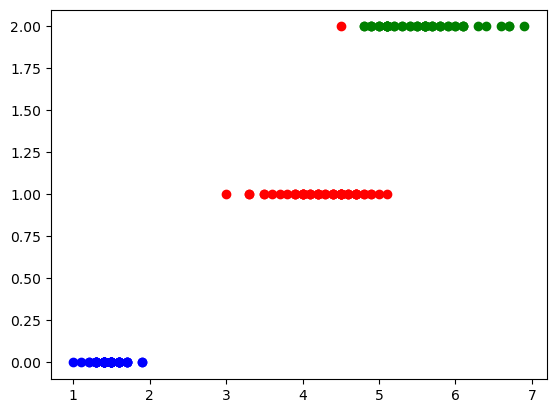

In [12]:
plt.scatter(kk1['petal length (cm)'],kk1['target'],color='red')
plt.scatter(kk2['petal length (cm)'],kk2['target'],color='blue')
plt.scatter(kk3['petal length (cm)'],kk3['target'],color='green')

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(kk[['petal length (cm)']])
kk['petal length (cm)']=scaler.transform(k[['petal length (cm)']])
kk

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.2,0,1
1,0.067797,0.2,0,1
2,0.050847,0.2,0,1
3,0.084746,0.2,0,1
4,0.067797,0.2,0,1
...,...,...,...,...
145,0.711864,2.3,2,2
146,0.677966,1.9,2,2
147,0.711864,2.0,2,2
148,0.745763,2.3,2,2


In [14]:
y_pred=kmeans.fit_predict(kk[['petal length (cm)','target']])

In [15]:
kk['cluster']=y_pred
kk

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.2,0,0
1,0.067797,0.2,0,0
2,0.050847,0.2,0,0
3,0.084746,0.2,0,0
4,0.067797,0.2,0,0
...,...,...,...,...
145,0.711864,2.3,2,2
146,0.677966,1.9,2,2
147,0.711864,2.0,2,2
148,0.745763,2.3,2,2


In [16]:
kk1=kk[kk.cluster==0]
kk2=kk[kk.cluster==1]
kk3=kk[kk.cluster==2]

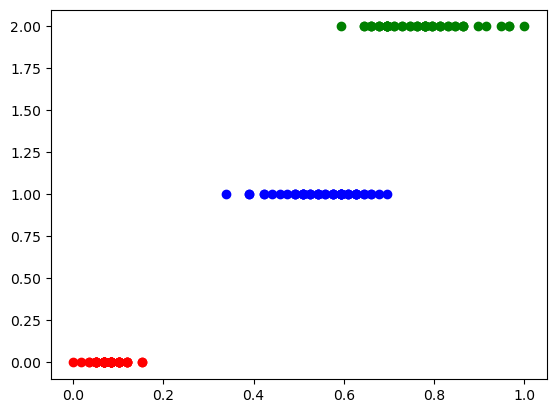

In [17]:
plt.scatter(kk1['petal length (cm)'],kk1['target'],color='red')
plt.scatter(kk2['petal length (cm)'],kk2['target'],color='blue')
plt.scatter(kk3['petal length (cm)'],kk3['target'],color='green')

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(kk[['petal width (cm)']])
kk['petal width (cm)']=scaler.transform(k[['petal width (cm)']])
kk

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,2
146,0.677966,0.750000,2,2
147,0.711864,0.791667,2,2
148,0.745763,0.916667,2,2


In [19]:
kk

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,2
146,0.677966,0.750000,2,2
147,0.711864,0.791667,2,2
148,0.745763,0.916667,2,2


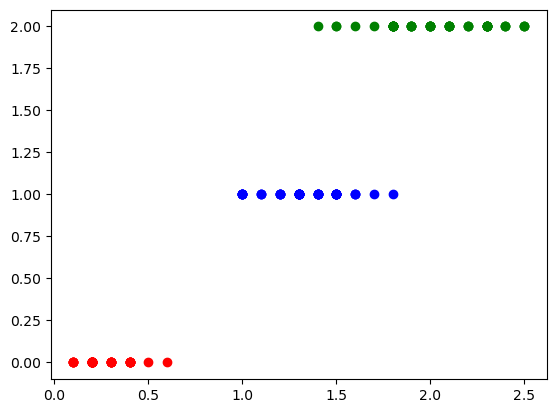

In [20]:
plt.scatter(kk1['petal width (cm)'],kk1['target'],color='red')
plt.scatter(kk2['petal width (cm)'],kk2['target'],color='blue')
plt.scatter(kk3['petal width (cm)'],kk3['target'],color='green')

In [21]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(kk[['petal length (cm)','target']])
    sse.append(km.inertia_)

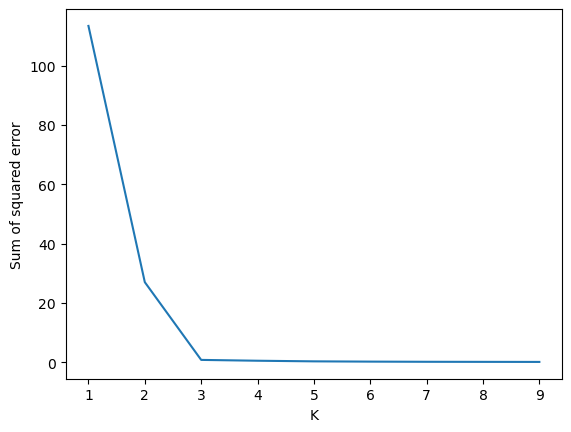

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [23]:
sse

[113.33885090491235,
 26.98087331226659,
 0.7820338983050851,
 0.5022054821980492,
 0.2939988167637171,
 0.20364669073104938,
 0.1468271979863477,
 0.121783381481744,
 0.10130866157367166]